In [1]:
# only to display all columns if needed
import pandas as pd
pd.options.display.max_columns = None

import geopandas as gpd

# Load a sample shapefile and plot it
Permian Basin shapefile downloaded from: http://www.beg.utexas.edu/resprog/permianbasin/gis.htm

In [2]:
shp = '../permian_basin/PBGSP_GIS/GIS_data/Boundary_PermianBasin_StudyArea_NAD27.shp'
df = gpd.read_file(shp)
df.plot()

# Import the GBDX helper functions and a sample query
## Have a look at keyword options for the query function

In [3]:
from gbdx_helpers import query_gbdx_by_geometry, sample_query, reduce_gbdx_results
help(query_gbdx_by_geometry)

Help on function query_gbdx_by_geometry in module gbdx_helpers:

query_gbdx_by_geometry(geom, query, count=5000, min_year=2000, max_year=2020, out_epsg=None)



## Look at the example query and edit accordingly. 
### Mine is looking only for WorldView-2/3/4

In [4]:
print(sample_query)
sample_query = 'item_type:WV03_VNIR OR item_type:WV02 OR item_type:WV04'

item_type:WV03_VNIR OR item_type:WV02 OR item_type:WV04 OR item_type:ESAProduct


## Make sure the dataframe is in WGS84 for the query (epsg=4326)

In [5]:
geom = df.to_crs(epsg=4326)
res = query_gbdx_by_geometry(geom, sample_query)

## GBDX tends to give multiple results for the same CatalogID. Optionally reduce the results which takes the first entry for each unique CatalogID in the search results

(<matplotlib.axes._subplots.AxesSubplot at 0x2db45759c50>, (1963, 98))

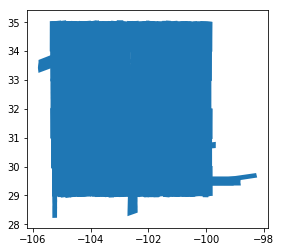

In [6]:
test = reduce_gbdx_results(res)
test.plot(), test.shape

## Compare the original number of search results to the reduced number

In [7]:
res.shape, test.shape

((5000, 98), (1963, 98))

## Plot the scene geometries (blue) over the search geometry (red)

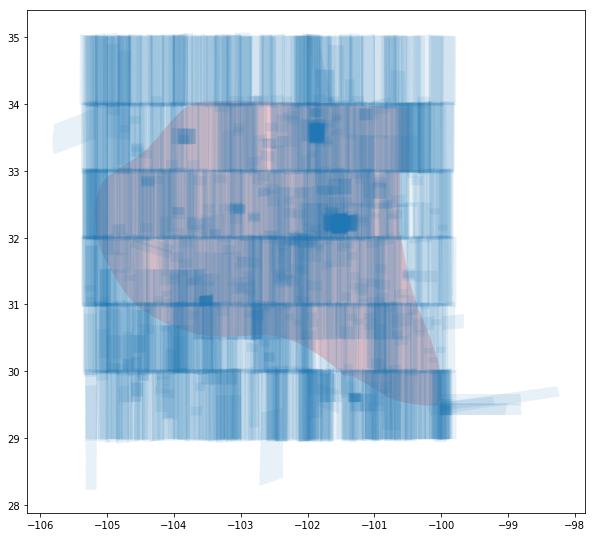

In [8]:
ax = geom.plot(color='r', alpha=0.2, figsize=(10,10))
test.plot(ax=ax, alpha=0.1)


## Write out the results to a shapefile
#### This operation needs at least the geometry column, as denoted in the assignment to `save_shp`. I've also included the `month`, `day`, `year` fields here, but one could also include the `properties.attributes.platformName` in that list in order to have the satellite name as a field. The `.rename` code replaces the `.` character with the `_` character so that it is valid for a shapefile column name.

In [9]:
out_shp = r'C:\Projects\permian_basin\dg_results\dg_permian_basin_WV020304.shp'

save_shp = test[['geometry','properties.attributes.catalogID', 'month', 'day', 'year']]
save_shp.rename(columns={col: col.replace('.','_') for col in save_shp.columns}).to_file(out_shp)

## Optionally, clip the scene geometries by the search geometry

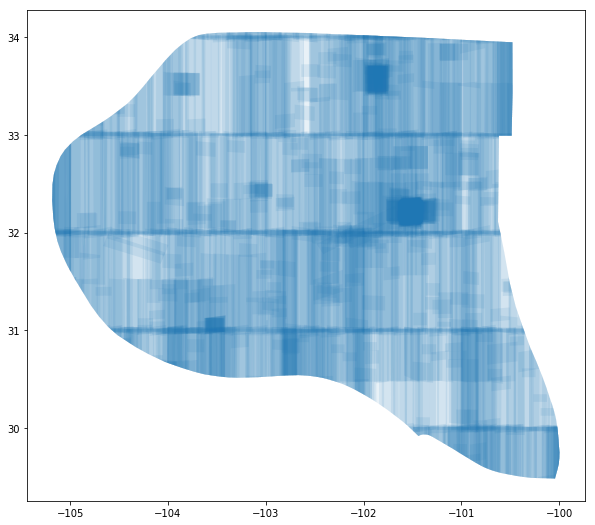

In [10]:
clipped = gpd.overlay(geom, test)
clipped.plot(alpha=0.1, figsize=(10,10))

## Similarly, write out the clipped scene geometries to a shape file

In [11]:
clipped_out_shp = r'C:\Projects\permian_basin\dg_results\clipped_dg_permian_basin_WV020304.shp'
save_shp = clipped[['geometry','properties.attributes.catalogID', 'month', 'day', 'year']]
save_shp.rename(columns={col: col.replace('.','_') for col in save_shp.columns}).to_file(clipped_out_shp)